In [ ]:
from plot import bars

In [ ]:
with open("cryptography/audio.txt") as inp:
    text = inp.read()

In [ ]:
import textwrap

In [ ]:
chunks = textwrap.wrap(text, 100)

In [ ]:
chunks[0]

"This probably looks like gibberish to you. And it should, because it's a cryptogram, a message in"

In [ ]:
chunks[1]

'code. But if I told you that all I did was shift every letter in the sentence to the next one in the'

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

def split_in_segments(text):
    tokens = 0
    mystring = list()
    segments = []
    for sent in sent_tokenize(text):
        newtokens = len(sent.split())
        tokens += newtokens
        mystring.append(str(sent).strip())
        if tokens > 512:
            segments.append(" ".join(mystring))
            mystring = []
            tokens = 0
    if mystring:
        segments.append(" ".join(mystring))
    return(segments)

In [ ]:
pieces = split_in_segments(text)

In [ ]:
len(pieces)

4

In [ ]:
[len(p) for p in pieces]

[2778, 2897, 2839, 1883]

In [ ]:
!hideout python -m spacy download en_core_web_sm

In [ ]:
#|export
import spacy
from math import ceil

In [ ]:
#|export
nlp = None
def spacy_init(model="en_core_web_sm"):
    global nlp
    nlp = spacy.load(model)

In [ ]:
spacy_init()
doc = nlp(text)

In [ ]:
#|export
def spacy_split(doc, size=None, n_pieces=1):
    total = len(doc)
    if size:
        n_pieces = ceil(total / size)
    pieces = []
    tokens = 0
    end_piece = 0
    sents = list(doc.sents)
    n_sents = len(sents)
    for i, sent in enumerate(sents):
        tokens += len(sent)
        if tokens > end_piece or n_sents - i <= n_pieces - len(pieces):
            pieces.append([])
            end_piece = total * len(pieces) / n_pieces
        pieces[-1].append(sent)
    return pieces

[18, 26, 21, 20, 21]
[426, 508, 458, 459, 486]
5 2337


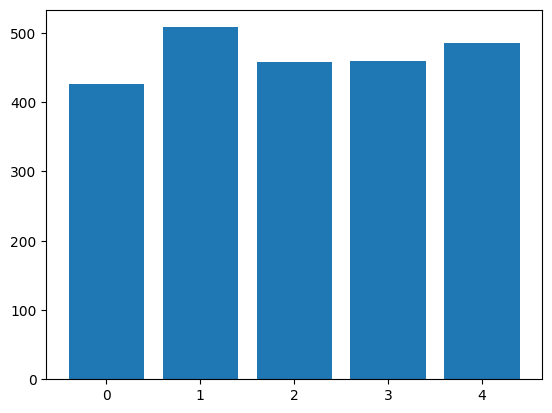

In [ ]:
pieces = spacy_split(doc, size=512)
lens = [sum(len(s) for s in p) for p in pieces]
print([len(p) for p in pieces])
print(lens)
print(len(lens), sum(lens))
bars(lens)

In [ ]:
#|export
def spacy_split_overlap(doc, size=None, n_pieces=1, overlap=0):
    total = len(doc)
    if size:
        n_pieces = ceil(total / size)
    overlap = min(overlap, ceil(total / (n_pieces+1)))
    pieces = []
    tokens = 0
    end_piece = 0
    sents = list(doc.sents)
    n_sents = len(sents)
    overlap_piece = []
    end_piece_1 = 0
    end_piece_2 = 0
    for i, sent in enumerate(sents):
        tokens += len(sent)
        if tokens > end_piece_2 or n_sents - i <= n_pieces - len(pieces):
            pieces.append(overlap_piece)
            overlap_piece = []
            end_piece_1 = (total - overlap) * len(pieces) / n_pieces
            end_piece_2 = end_piece_1 + overlap
        elif tokens > end_piece_1:
            overlap_piece.append(sent)
        pieces[-1].append(sent)
    return pieces

[25, 29, 26, 23, 24]
[554, 575, 544, 527, 577]
5 2777


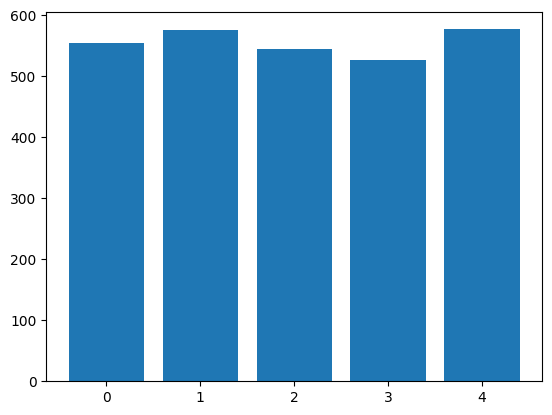

In [ ]:
pieces = spacy_split_overlap(doc, size=512, overlap=128)
lens = [sum(len(s) for s in p) for p in pieces]
print([len(p) for p in pieces])
print(lens)
print(len(lens), sum(lens))

import matplotlib.pyplot as plt
plt.bar(range(len(lens)), lens)
plt.show()

In [ ]:
#|default_exp split
import ucm
ucm.export()

<br><br><br><br><br><br><br><br>

## scratch

In [ ]:
from math import ceil

size = 512
overlap = 128
total = sum(len(s) for s in doc.sents)
n_pieces = ceil(total / size)

In [ ]:
chunks = []
count = 0
tokens = 0
overlap_chunk = []
end_chunk_1 = 0
for sent in doc.sents:
    tokens += len(sent)
    if tokens > end_chunk_1:
        overlap_chunk.append(sent)
    if not chunks or tokens > end_chunk_2:
        chunks.append(overlap_chunk.copy())
        overlap_chunk = []
        count += 1
        end_chunk_2 = (total + overlap) * count / n_pieces
        end_chunk_1 = end_chunk_2 - overlap
    chunks[-1].append(sent)

In [ ]:
n_pieces

5

In [ ]:
chunks = []
count = 0
tokens = 0
for sent in doc.sents:
    tokens += len(sent)
    if not chunks or tokens > end_chunk:
        chunks.append([])
        count += 1
        end_chunk = total * count / n_pieces
    chunks[-1].append(sent)

In [ ]:
len(chunks)

5

In [ ]:
lens = [sum(len(s) for s in c) for c in chunks]
lens, sum(lens)

([426, 508, 458, 459, 486], 2337)

In [ ]:
chunks = []
count = 0
tokens = 0
overlap_chunk = []
end_chunk_1 = 0
for sent in doc.sents:
    tokens += len(sent)
    if tokens > end_chunk_1:
        overlap_chunk.append(sent)
    if not chunks or tokens > end_chunk_2:
        chunks.append(overlap_chunk.copy())
        overlap_chunk = []
        count += 1
        end_chunk_2 = (total + overlap) * count / n_pieces
        end_chunk_1 = end_chunk_2 - overlap
    chunks[-1].append(sent)

In [ ]:
len(chunks)

5

In [ ]:
lens = [sum(len(s) for s in c) for c in chunks]
lens, sum(lens)

([489, 638, 658, 628, 561], 2974)

In [ ]:
next(doc.sents)

This probably looks like gibberish to you.